# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the temperature and humidity data set

In [3]:
df = pd.read_csv("train_humidity_temp.csv")

In [4]:
df.head()

,temp,humidity
0,9.84,81
1,9.02,80
2,9.02,80
3,9.84,75
4,9.84,75


# Selecting X random data points to be the initial cluster centroids

In [71]:
num_clusters = 10

# The data points for the cluster centroids are in the form: (temp, humidity)

In [72]:
centroids = []
for i in range(0, num_clusters):
    centroids.append((df.iloc[np.random.randint(0, df.shape[0])]['temp'], df.iloc[np.random.randint(0, df.shape[0])]['humidity']))

In [73]:
centroids

[(28.7, 43.0),
 (10.66, 46.0),
 (32.8, 58.0),
 (22.14, 53.0),
 (13.94, 47.0),
 (33.62, 20.0),
 (14.76, 60.0),
 (9.02, 58.0),
 (29.52, 78.0),
 (16.4, 69.0)]

# Initialize a dictionary of 5 lists to store the points that map to the closest centroid

In [74]:
centroid_to_row_num = {}

for each_cluster_index in range(0, num_clusters):
    centroid_to_row_num[each_cluster_index] = []

# For each row, calculate its Euclidean distance to each centroid

In [75]:
def find_closest_centroid(row):
    closest_distance = 999999
    closest_centroid = 99
    
    for i, centroid_vector in enumerate(centroids):
        current_distance = np.sqrt(np.power((row['temp'] - centroid_vector[0]), 2) + np.power((row['humidity'] - centroid_vector[1]), 2))
        if (current_distance < closest_distance):
            closest_distance = current_distance
            closest_centroid = i
    
    centroid_to_row_num[closest_centroid].append((row['temp'], row['humidity']))
    
    return row

In [76]:
df.apply(find_closest_centroid, axis=1)

,temp,humidity
0,9.84,81.0
1,9.02,80.0
2,9.02,80.0
3,9.84,75.0
4,9.84,75.0
5,9.84,75.0
6,9.02,80.0
7,8.20,86.0
8,9.84,75.0
9,13.12,76.0


# Plot the initial clusters and data points on a scatterplot

Text(0,0.5,'Humidity')

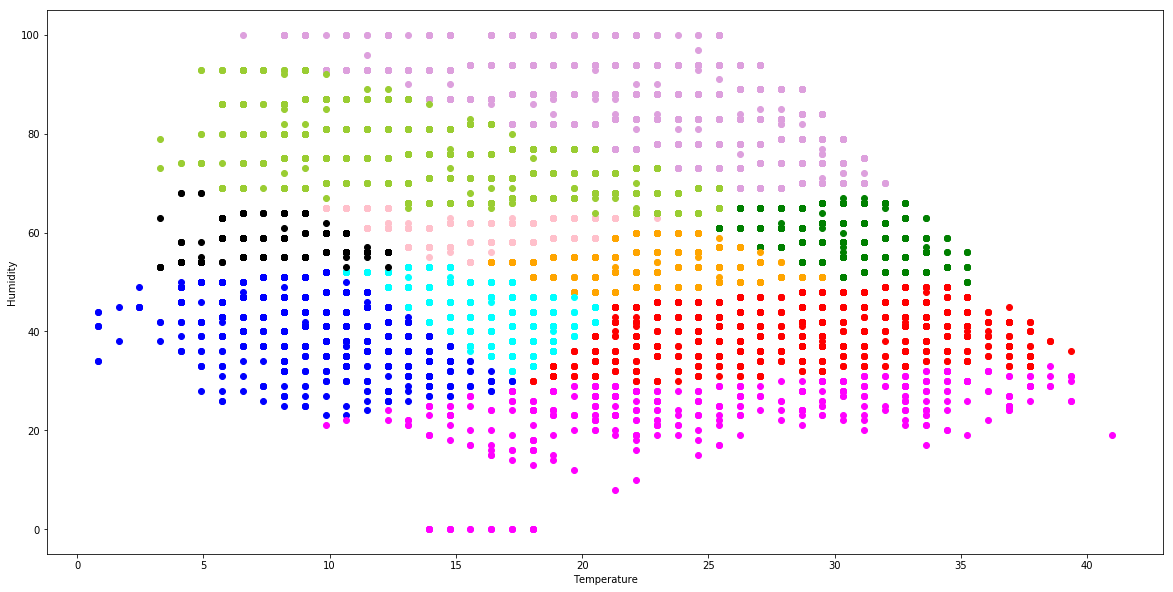

In [77]:
graph_point_colors = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'pink', 'black', 'plum', 'yellowgreen']
plt.figure(figsize=(20,10))
for i in range(0, num_clusters):
    plt.plot([x[0] for x in centroid_to_row_num[i]], [x[1] for x in centroid_to_row_num[i]], 'o', color=graph_point_colors[i])
plt.xlabel('Temperature')
plt.ylabel('Humidity')

# Calculate the new centroid means

In [78]:
for cluster_centroid_index in centroid_to_row_num:
    centroids[cluster_centroid_index] = (np.mean([x[0] for x in centroid_to_row_num[cluster_centroid_index]]), np.mean([x[1] for x in centroid_to_row_num[cluster_centroid_index]]))

In [79]:
centroids

[(28.45925385239254, 40.2992700729927),
 (9.466572769953052, 40.54929577464789),
 (30.123311403508772, 59.473684210526315),
 (23.193137254901963, 53.61484593837535),
 (15.26322105263158, 45.45789473684211),
 (25.292957746478873, 23.94600938967136),
 (15.172013093289692, 60.98363338788871),
 (8.772794117647058, 57.81617647058823),
 (23.00228307254623, 84.06330014224751),
 (15.362194007110206, 74.35093956323007)]

# Re-calculate the Euclidean distance between each point and the new cluster centroids

In [80]:
df.apply(find_closest_centroid, axis=1)

,temp,humidity
0,9.84,81.0
1,9.02,80.0
2,9.02,80.0
3,9.84,75.0
4,9.84,75.0
5,9.84,75.0
6,9.02,80.0
7,8.20,86.0
8,9.84,75.0
9,13.12,76.0


# Plot the new clusters and data points

Text(0,0.5,'Humidity')

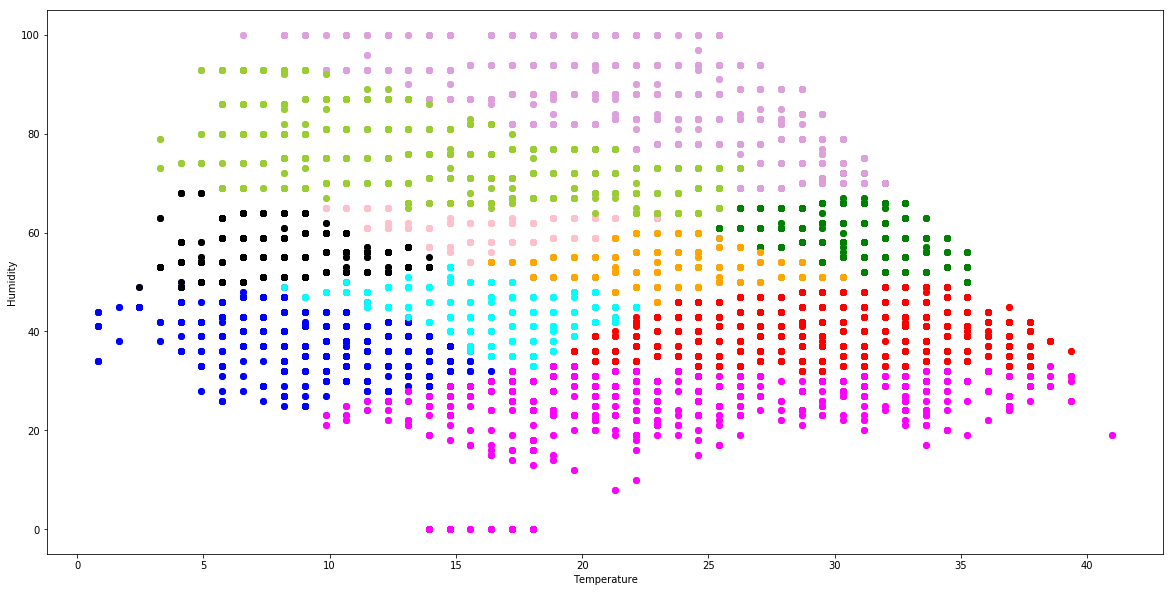

In [81]:
graph_point_colors = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'pink', 'black', 'plum', 'yellowgreen']
plt.figure(figsize=(20,10))
for i in range(0, num_clusters):
    plt.plot([x[0] for x in centroid_to_row_num[i]], [x[1] for x in centroid_to_row_num[i]], 'o', color=graph_point_colors[i])
plt.xlabel('Temperature')
plt.ylabel('Humidity')

# For the next 5 iterations, repeat the new centroid re-calculation, cluster grouping for each data point, and plot the adjusted clusters and data points

In [82]:
num_iterations = 5

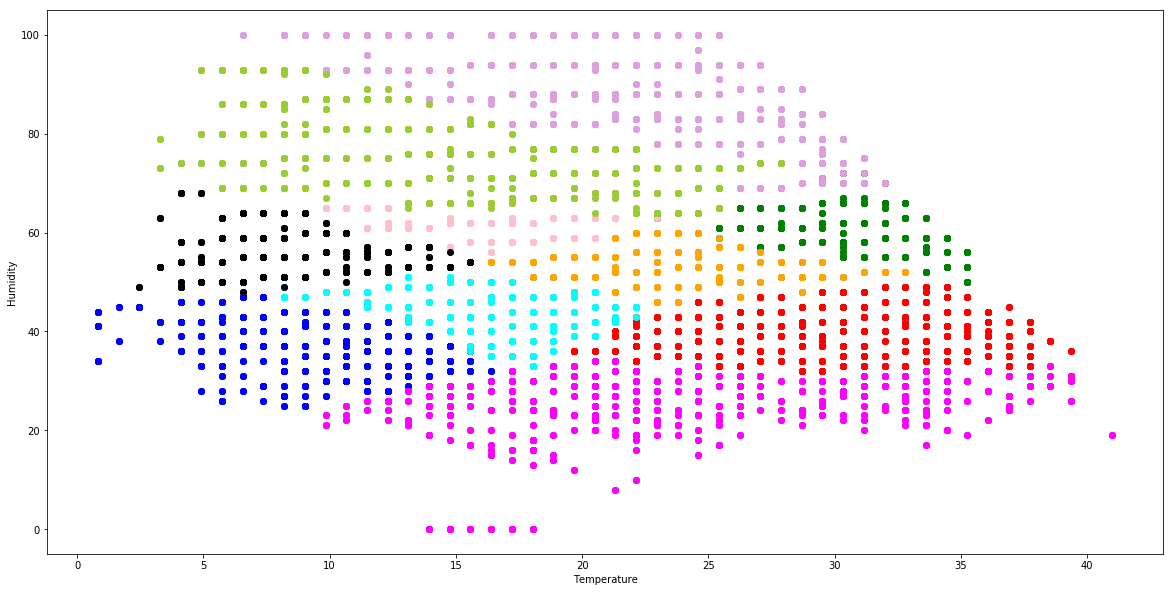

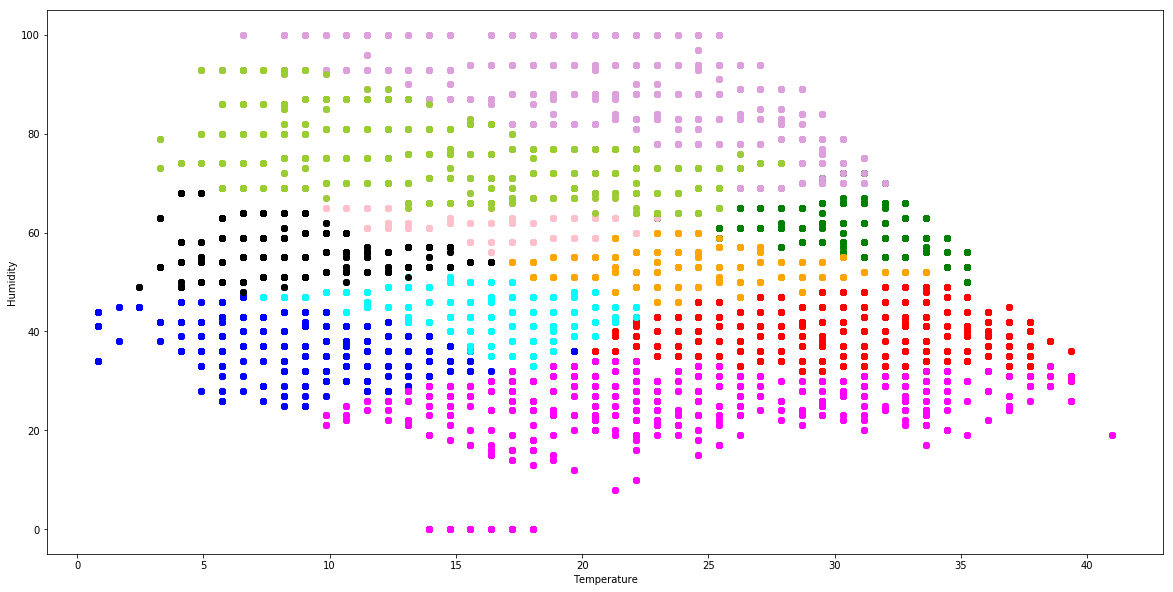

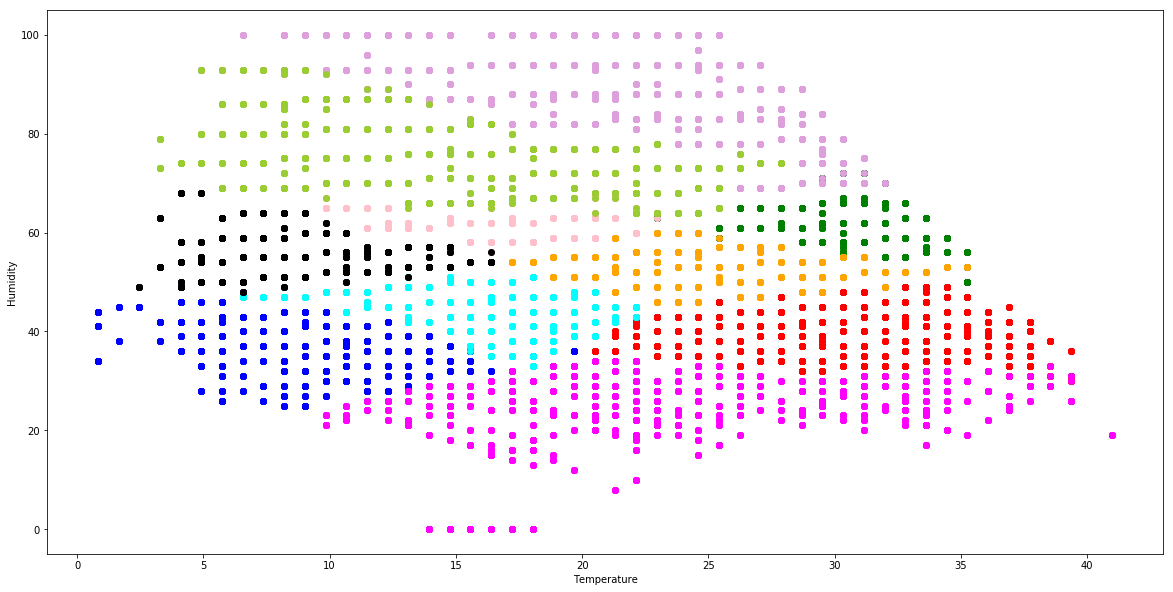

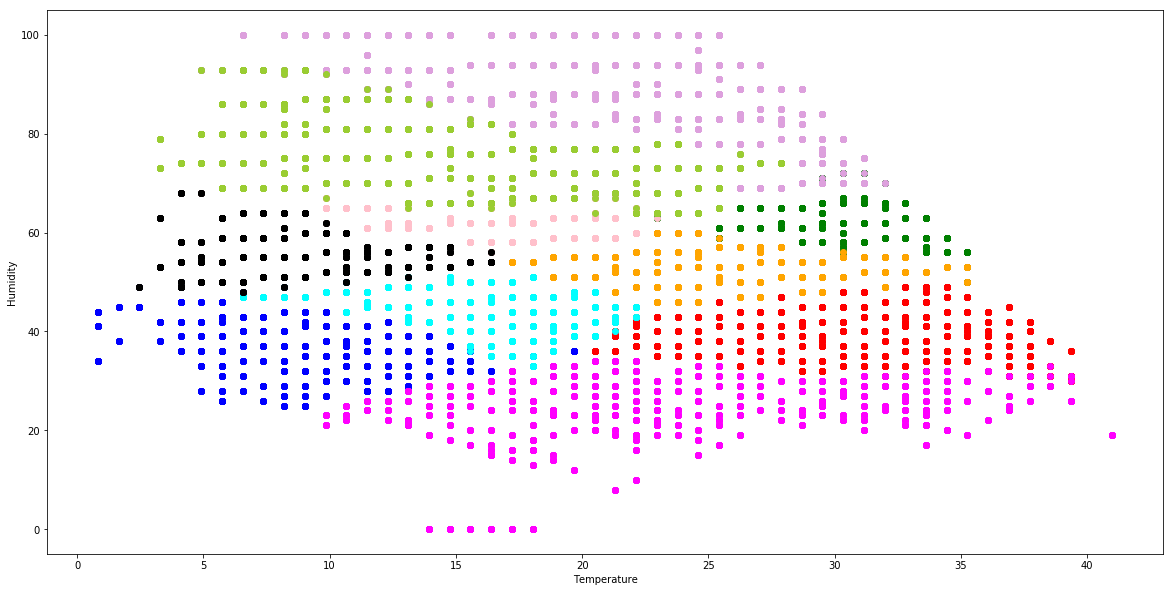

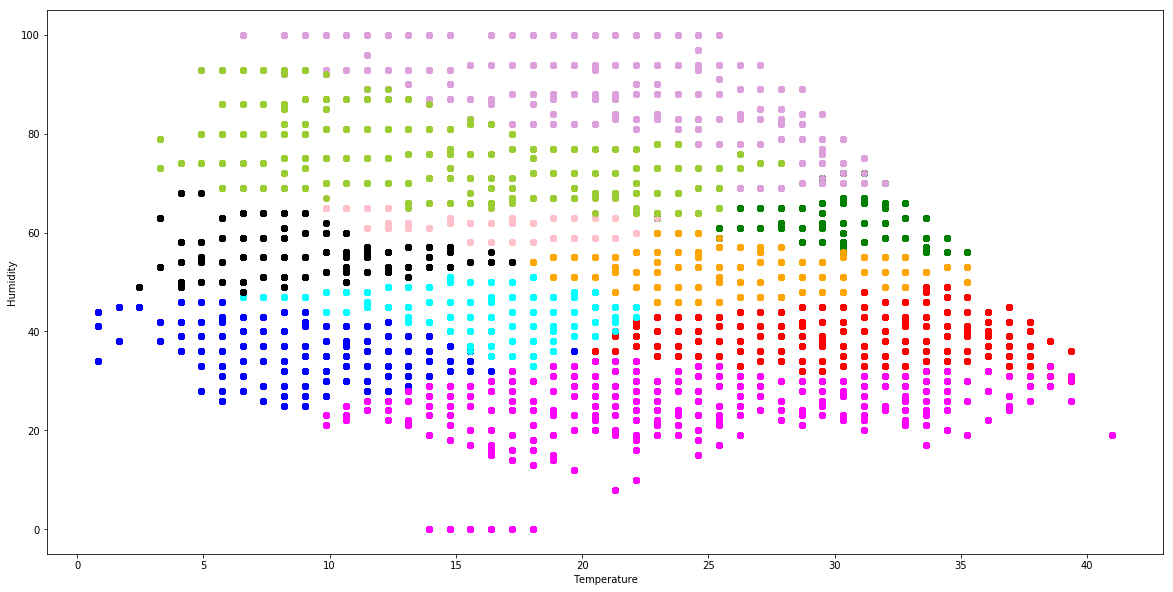

In [83]:
for i in range(0, num_iterations):
    # Re-calculate the new cluster centroid
    for cluster_centroid_index in centroid_to_row_num:
        centroids[cluster_centroid_index] = (np.mean([x[0] for x in centroid_to_row_num[cluster_centroid_index]]), np.mean([x[1] for x in centroid_to_row_num[cluster_centroid_index]]))
    
    # Re-calculate the distance between each point and the new cluster centroid,
    # assigning them a new cluster grouping if necessary
    df.apply(find_closest_centroid, axis=1)
    
    # Plot the new adjusted cluster(s) and data point(s)
    graph_point_colors = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'pink', 'black', 'plum', 'yellowgreen']
    plt.figure(figsize=(20,10))
    for i in range(0, num_clusters):
        plt.plot([x[0] for x in centroid_to_row_num[i]], [x[1] for x in centroid_to_row_num[i]], 'o', color=graph_point_colors[i])
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')